In [8]:
import forecast
import bokeh
import xarray as xr
import datetime

In [9]:
date = datetime.datetime.today()
year = date.year
month = f'{date.month:02d}'
day = f'{date.day:02d}'
forecast_start_time = '00'

In [10]:
base_url = 'https://nomads.ncep.noaa.gov:9090/dods/'

dset_paths = {'gefs': f'{base_url}gens/gens{year}{month}{day}/gep_all_{forecast_start_time}z',
              'gefs_0p5': f'{base_url}gens_bc/gens{year}{month}{day}/gep_all_{forecast_start_time}z',
              'gfs_0p25': f'{base_url}gfs_0p25_1hr/gfs{year}{month}{day}/gfs_0p25_1hr_{forecast_start_time}z', }

gefs, gfs, gefs_0p5 = forecast.load_datasets_from_nomads(dset_paths)

In [11]:
gefs_0p5 = forecast.sample_region(gefs_0p5)

In [12]:
tmp2m = gefs_0p5.tmp2m.load()
tcdcclm = gefs_0p5.tcdcclm.load()

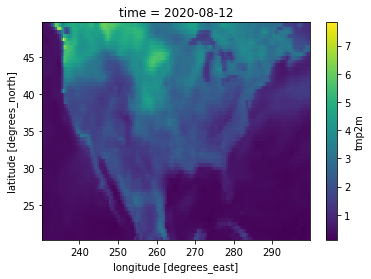

In [17]:
tmp2m.std(dim='ens').isel(time=-1).plot()

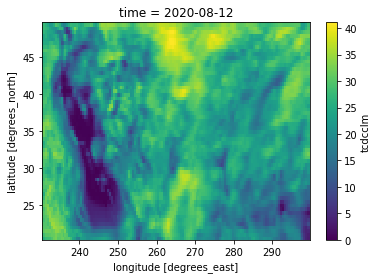

In [22]:
tcdcclm.std(dim='ens').isel(time=-1).plot()

In [23]:
tmp2m.to_netcdf('tmp2m.nc')
tcdcclm.to_netcdf('tcdcclm.nc')